In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 4*x + 5

In [15]:
f(3.0)

20.0

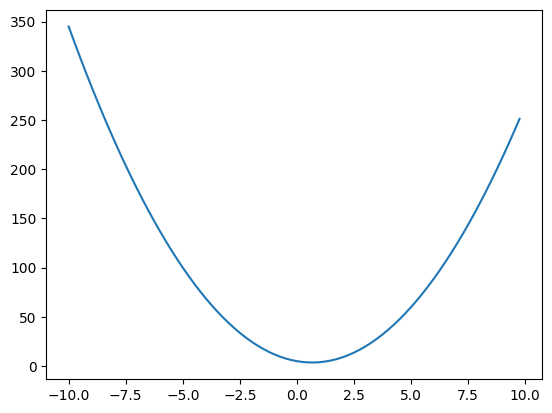

In [13]:
xs = np.arange(-10,10,0.25)
ys = f(xs)
plt.plot(xs , ys)

In [14]:
ys

array([345.    , 329.1875, 313.75  , 298.6875, 284.    , 269.6875,
       255.75  , 242.1875, 229.    , 216.1875, 203.75  , 191.6875,
       180.    , 168.6875, 157.75  , 147.1875, 137.    , 127.1875,
       117.75  , 108.6875, 100.    ,  91.6875,  83.75  ,  76.1875,
        69.    ,  62.1875,  55.75  ,  49.6875,  44.    ,  38.6875,
        33.75  ,  29.1875,  25.    ,  21.1875,  17.75  ,  14.6875,
        12.    ,   9.6875,   7.75  ,   6.1875,   5.    ,   4.1875,
         3.75  ,   3.6875,   4.    ,   4.6875,   5.75  ,   7.1875,
         9.    ,  11.1875,  13.75  ,  16.6875,  20.    ,  23.6875,
        27.75  ,  32.1875,  37.    ,  42.1875,  47.75  ,  53.6875,
        60.    ,  66.6875,  73.75  ,  81.1875,  89.    ,  97.1875,
       105.75  , 114.6875, 124.    , 133.6875, 143.75  , 154.1875,
       165.    , 176.1875, 187.75  , 199.6875, 212.    , 224.6875,
       237.75  , 251.1875])

In [17]:
h = 0.001
x = 3.0
(f(x + h) - f(x))/h

14.00300000000243

In [19]:
a = 2.0
b = -3.0
c = 10.0
d = (a * b) + c
d

4.0

In [22]:
h = 0.0001
a = 2.0
b = -3.0
c = 10.0
d = (a * b) + c

a += h

d2 = (a * b) + c
print('d1 : ' , d)
print('d2 : ' ,  d2)
print("slope wrt a:", (d2 - d)/h)

d1 :  4.0
d2 :  3.999699999999999
slope wrt a: -3.000000000010772


In [36]:
class Value:
    def __init__(self , data , _children=() , _op = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
    
    def __repr__(self):
        return f"Value({self.data})"
    def __add__(self , other):
        out = Value(self.data + other.data , (self , other) , '+')
        return out
    def __mul__(self , other):
        out = Value(self.data * other.data , (self , other) , '*')
        return out

a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
e = Value(-10.0)
d = (a * b) + (c * e)
d

Value(-106.0)

In [35]:
d._prev ,  d._op

({Value(-100.0), Value(-6.0)}, '+')

In [54]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)

    for n in nodes:
        nid = str(id(n))
        # main value node
        dot.node(nid, label=f"{n.data:.4f}", shape='circle')

        # operator node (if operation exists)
        if n._op:
            op_id = nid + n._op
            dot.node(op_id, label=n._op, shape='box')
            dot.edge(op_id, nid)   # op → value

    # connect child → op
    for c, p in edges:
        parent_id = str(id(p))
        if p._op:
            dot.edge(str(id(c)), parent_id + p._op)

    return dot


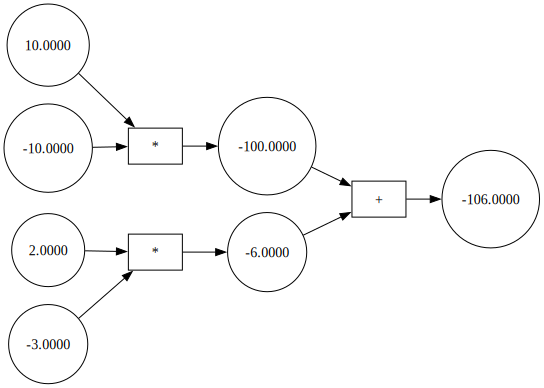

In [55]:
draw_dot(d)